![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (150+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
To be able to get started, you need to obtain an API Key from FinancialModelingPrep. This is used to gain access to 30+ years of financial statement both annually and quarterly. Note that the Free plan is limited to 250 requests each day, 5 years of data and only features companies listed on US exchanges.

___ 

<b><div align="center">Obtain an API Key from FinancialModelingPrep <a href="https://www.jeroenbouma.com/fmp" target="_blank">here</a>.</div></b>
___

Through the link you are able to subscribe for the free plan and also premium plans at a **15% discount**. This is an affiliate link and thus supports the project at the same time. I have chosen FinancialModelingPrep as a source as I find it to be the most transparent, reliable and at an affordable price. When you notice that data is inaccurate or have any other issue related to the data, note that I simply provide the means to access this data and I am not responsible for the accuracy of the data itself. For this, use <a href="https://site.financialmodelingprep.com/contact" target="_blank">their contact form</a> or provide the data yourself. 

The current Notebook is revolved around the Toolkit class, a great starting point. If you are interested in the other modules, you can find the related Notebooks below. **Please view the documentation <a href="https://www.jeroenbouma.com/projects/financetoolkit/docs" target="_blank">here</a> to find all the available functionality.**

<style>
.button {
  color: #fff !important;
  background-color: #58abc4;
  display: inline-block;
  margin-bottom: 0.25em;
  padding: 0.5em 1em;
  font-family: -apple-system,BlinkMacSystemFont,"Roboto","Segoe UI","Helvetica Neue","Lucida Grande",Arial,sans-serif;
  font-size: .75em;
  font-weight: bold;
  text-align: center;
  text-decoration: none;
  border-width: 0;
  border-radius: 4px;
  cursor: pointer;
}

.button-current {
  background-color: #d67f05;
}

a:hover {
  color: #fff !important;
  font-weight: normal !important;
}
</style>

<div style="display: flex; justify-content: space-between;" class="show-on-desktop">
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//getting-started" target="_blank" class="button button-current" style="flex: 1;margin-right:5px"">Toolkit</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//discovery-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Discovery</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//ratios-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Ratios</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//models-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Models</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//options-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Options</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//technicals-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Technicals</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//risk-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Risk</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//performance-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Performance</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//economics-module"  target="_blank" class="button" style="flex: 1;margin-right:5px">Economics</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//fixed-income-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Fixed income</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//portfolio-module" target="_blank" class="button" style="flex: 1; ">Portfolio</a>
</div>

In [ ]:
from financetoolkit import Toolkit

API_KEY = "FINANCIAL_MODELING_PREP_API_KEY"

**Initializing only is required once.** This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum. Note that in this example annual data is used but by adding `quarterly=True` to the Toolkit initialization, quarterly data can also be collected. Note that this requires a Premium subscription from FMP.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(
    ["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY, start_date="2005-01-01"
)

Let's start off by collecting some historical data. Here, there are multiple periods that can be selected. This can be `daily`, `weekly`, `monthly`, `quarterly`, or `yearly`. The default is `daily`. If you provide an API key it will automatically collect data via FinancialModelingPrep, otherwise it defaults to Yahoo Finance. You can change this behaviour by changing the `historic_source` parameter in the toolkit initialization.

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  9.57it/s]


Open                                  High                       \
             AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT  GOOGL   AMZN   
date                                                                           
2005-01-03   1.16  26.82   4.94   2.25    121.56   1.16  26.95    5.1   2.27   
2005-01-04   1.14  26.87   5.04   2.13    120.46   1.17   27.1   5.08   2.16   
2005-01-05   1.15  26.85   4.84   2.08    118.74   1.17   27.1   4.93   2.14   
2005-01-06   1.16  26.87   4.89   2.09    118.44   1.16  27.06    4.9   2.11   
2005-01-07   1.16  26.82   4.77   2.07    118.97   1.24  26.89   4.86   2.13   
...           ...    ...    ...    ...       ...    ...    ...    ...    ...   
2025-09-02 229.25 500.47 208.44 223.52     637.5 230.85  506.0 211.68 226.17   
2025-09-03 237.21 503.79 226.21 225.21    642.67 238.85 507.79 231.31 227.17   
2025-09-04 238.45  504.3 229.65 231.19    644.42  239.9 508.15 232.37 235.77   
2025-09-05  240.0 509.07  232.2 235.19    651.48 241.32 511.97 235.76  236.0   
2025-09-08  239.3 498.11 235.47 234.94    648.62 240.15  501.2 238.13  237.6   

                      ... Excess Volatility                                 \
           Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
date                  ...                                                    
2005-01-03    121.76  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2005-01-04    120.54  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2005-01-05    119.25  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2005-01-06    119.15  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2005-01-07    119.23  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
...              ...  ...               ...    ...    ...    ...       ...   
2025-09-02    640.49  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2025-09-03    644.21  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2025-09-04    649.15  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2025-09-05    652.21  ...            0.0233 0.0206 0.0221 0.0265    0.0166   
2025-09-08    649.84  ...            0.0233 0.0206 0.0221 0.0265    0.0166   

           Cumulative Return                                     
                        AAPL    MSFT   GOOGL     AMZN Benchmark  
date                                                             
2005-01-03               1.0     1.0     1.0      1.0       1.0  
2005-01-04            1.0088  1.0037  0.9606   0.9462    0.9869  
2005-01-05            1.0177  1.0015  0.9546   0.9372     0.981  
2005-01-06            1.0177  1.0004   0.931   0.9193     0.986  
2005-01-07            1.0973  0.9974  0.9566   0.9507    0.9845  
...                      ...     ...     ...      ...       ...  
2025-09-02           203.292 18.8901 41.6864 101.0493    5.3223  
2025-09-03          211.0354 18.8987 45.4951 101.3408    5.3511  
2025-09-04          212.1947 18.9966 45.8185 105.6861    5.3958  
2025-09-05           212.115 18.5116 46.3511 104.1839    5.3802  
2025-09-08          210.5133 18.6313 46.1617 105.7578    5.3934  

[5203 rows x 60 columns]

Open                                  High                       \
       AAPL   MSFT  GOOGL   AMZN Benchmark   AAPL   MSFT  GOOGL   AMZN   
Date                                                                     
2005   2.53  26.16  10.44   2.39     124.8   2.59  26.31  10.47   2.41   
2006    3.0  29.86  11.56    2.0     142.1   3.05  30.15  11.62   2.01   
2007   7.12   35.9  17.48   4.69     147.1   7.16  35.99  17.58   4.72   
2008   3.07  19.31   7.61   2.54     89.08   3.13  19.68   7.78   2.58   
2009   7.61  30.98  15.63   6.85    112.77   7.62  30.99  15.65   6.86   
2010  11.53   27.8  14.93    9.1    125.53  11.55  27.92  14.98   9.12   
2011  14.41   26.0  16.07   8.67    126.02  14.51  26.12  16.18   8.76   
2012  18.23  26.59  17.52  12.19    139.66  19.12  26.77  17.78  12.62   
2013  19.79   37.4  27.83  19.73    184.07  20.05  37.58  28.05  19.94   
2014  28.21  46.73  26.89  15.58    207.99  28.28  47.44  26.92  15.65   
2015  26.75  56.04  39.39   34.3    205.13  26.76  56.19  39.42  34.39   
2016  29.16  62.96  40.16  38.32    224.73   29.3  62.99  40.16  38.37   
2017  42.63  85.63  52.77  59.12    268.53  42.65  86.05   52.9   59.2   
2018  39.63 101.29  52.89  75.54    249.56  39.84  102.4  53.15  76.04   
2019  72.48 156.77  66.79   92.1    320.53  73.42 157.77  67.03  92.66   
2020 134.08  221.7  86.86 163.75    371.78 134.74  223.0  87.88 164.15   
2021 178.09 338.51 146.05 168.96    475.64 179.23 339.36  146.7 169.35   
2022 128.41 238.21  86.98  83.12    380.64 129.95 239.96   88.3  84.05   
2023  193.9  376.0 139.63  153.1    476.49  194.4 377.16 140.36 153.89   
2024 252.44  426.1 191.08 222.97    589.91 253.28 426.73 191.96 223.23   
2025  239.3 498.11 235.47 234.94    648.62 240.15  501.2 238.13  237.6   

                ... Excess Volatility                                 \
     Benchmark  ...              AAPL   MSFT  GOOGL   AMZN Benchmark   
Date            ...                                                    
2005    125.06  ...            0.3929 0.1443 0.3291 0.3556    0.1082   
2006    142.54  ...            0.3895 0.2127 0.3413 0.4046    0.1099   
2007    147.61  ...             0.382  0.236 0.2482 0.5217    0.1644   
2008     90.97  ...            0.5828 0.4883  0.557  0.665    0.4183   
2009     112.8  ...            0.3438 0.3739 0.3086 0.5297    0.2693   
2010    125.87  ...            0.2766 0.2313 0.2939 0.3394    0.1943   
2011    126.33  ...            0.2782 0.2546 0.3127 0.3887    0.2467   
2012    142.56  ...            0.2928 0.2095 0.2333 0.3177    0.1304   
2013    184.69  ...            0.2875 0.2617 0.2298  0.275    0.1304   
2014    208.19  ...            0.2198 0.1922 0.2134 0.3244    0.1173   
2015    205.89  ...            0.2696 0.2836 0.2884 0.3382    0.1574   
2016    224.83  ...            0.2403 0.2341   0.21 0.3062    0.1395   
2017    268.55  ...            0.1757 0.1483 0.1531  0.209    0.0687   
2018    250.19  ...            0.2901 0.2852 0.2849 0.3641    0.1743   
2019    322.13  ...            0.2703 0.2052  0.244 0.2327    0.1377   
2020    374.66  ...            0.4708 0.4411 0.3873 0.3893    0.3402   
2021    476.86  ...            0.2514 0.2129 0.2467 0.2414    0.1333   
2022    382.58  ...            0.3773 0.3691 0.4047 0.5207    0.2663   
2023    477.03  ...             0.221 0.2629 0.3188 0.3421    0.1527   
2024    590.64  ...            0.2273 0.2052 0.2814 0.2841    0.1336   
2025    649.84  ...            0.3677 0.2663 0.3394 0.3582    0.2207   

     Cumulative Return                                    
                  AAPL    MSFT   GOOGL    AMZN Benchmark  
Date                                                      
2005               1.0     1.0     1.0     1.0       1.0  
2006             1.179  1.1419  1.1098  0.8347    1.1374  
2007             2.751  1.3614  1.6667  1.9619    1.1743  
2008            1.1868  0.7434  0.7418  1.0847    0.7248  
2009              2.93  1.1656  1.4942  2.8517     0.895  
2010            4.4825  1.067

<Axes: title={'center': 'Cumulative Returns of Apple, Microsoft, Google and Amazon'}, xlabel='Date', ylabel='Cumulative Return'>

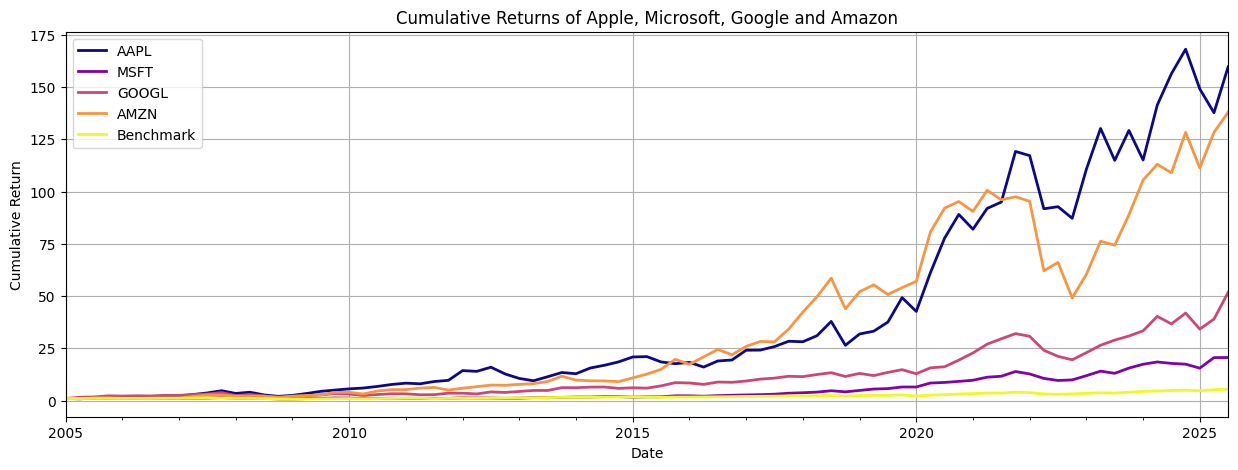

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data())

# Obtain yearly historical data from each company
display(companies.get_historical_data(period="yearly"))

# Plot the Cumulative Returns
companies.get_historical_data(period="quarterly")["Cumulative Return"].plot(
    figsize=(15, 5),
    title="Cumulative Returns of Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    colormap="plasma",
    xlabel="Date",
    ylabel="Cumulative Return",
)

It can be of help to understand some general statistics about this data as well, this can be done with `get_historical_statistics`. This is especially relevant when looking at products that are denoted in different currencies.

In [4]:
companies.get_historical_statistics()

Obtaining historical statistics: 100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


,MSFT,AAPL,GOOGL,AMZN
Currency,USD,USD,USD,USD
Symbol,MSFT,AAPL,GOOGL,AMZN
Exchange Name,NASDAQ,NASDAQ,NASDAQ,NASDAQ
Instrument Type,NaN,NaN,NaN,NaN
First Trade Date,NaN,NaN,NaN,NaN
Regular Market Time,NaN,NaN,NaN,NaN
GMT Offset,NaN,NaN,NaN,NaN
Timezone,NaN,NaN,NaN,NaN
Exchange Timezone Name,NaN,NaN,NaN,NaN
IPO Date,1986-03-13,1980-12-12,2004-08-19,1997-05-15


Then on to the financial statements in which for any period, based on how this is defined in the Toolkit initialization, can be collected. This can also be quarterly financial statements if the `quarterly=True` parameter is added to the Toolkit initialization.

In [5]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

Obtaining balance data: 100%|██████████| 4/4 [00:00<00:00,  9.45it/s]


date                                                   2005          2006  \
AAPL Cash and Cash Equivalents                 3491000000.0  6392000000.0   
     Short Term Investments                    4770000000.0  3718000000.0   
     Cash and Short Term Investments           8261000000.0 10110000000.0   
     Accounts Receivable                        895000000.0  1252000000.0   
      Other Receivables                         417000000.0  1593000000.0   
...                                                     ...           ...   
MSFT Total Shareholder Equity                 48115000000.0 40104000000.0   
     Total Equity                             48115000000.0 40104000000.0   
     Minority Interest                                  0.0           0.0   
     Total Liabilities and Shareholder Equity           0.0           0.0   
     Total Liabilities and Equity             70815000000.0 69597000000.0   

date                                                   2007          2008  \
AAPL Cash and Cash Equivalents                 9352000000.0 11875000000.0   
     Short Term Investments                    6034000000.0 10236000000.0   
     Cash and Short Term Investments          15386000000.0 22111000000.0   
     Accounts Receivable                       1637000000.0  2422000000.0   
      Other Receivables                        2392000000.0  2282000000.0   
...                                                     ...           ...   
MSFT Total Shareholder Equity                 31097000000.0 36286000000.0   
     Total Equity                             31097000000.0 36286000000.0   
     Minority Interest                                  0.0           0.0   
     Total Liabilities and Shareholder Equity           0.0           0.0   
     Total Liabilities and Equity             63171000000.0 72793000000.0   

date                                                   2009          2010  \
AAPL Cash and Cash Equivalents                 5263000000.0 11261000000.0   
     Short Term Investments                   18201000000.0 14359000000.0   
     Cash and Short Term Investments          23464000000.0 25620000000.0   
     Accounts Receivable                       3361000000.0  5510000000.0   
      Other Receivables                        1696000000.0  4414000000.0   
...                                                     ...           ...   
MSFT Total Shareholder Equity                 39558000000.0 46175000000.0   
     Total Equity                             39558000000.0 46175000000.0   
     Minority Interest                                  0.0           0.0   
     Total Liabilities and Shareholder Equity           0.0           0.0   
     Total Liabilities and Equity             77888000000.0 86113000000.0   

date                                                    2011           2012  \
AAPL Cash and Cash Equivalents                  9815000000.0  10746000000.0   
     Short Term Investments                    16137000000.0  18383000000.0   
     Cash and Short Term Investments           25952000000.0  29129000000.0   
     Accounts Receivable                        5369000000.0  10930000000.0   
      Other Receivables                         6348000000.0   7762000000.0   
...                                                      ...            ...   
MSFT Total Shareholder Equity                  57083000000.0  66363000000.0   
     Total Equity                              57083000000.0  66363000000.0   
     Minority Interest                                   0.0            0.0   
     Total Liabilities and Shareholder Equity            0.0            0.0   
     Total Liabilities and Equity             108704000000.0 121271000000.0   

date                                                    2013           2014  \
AAPL Cash and Cash Equivalents                 14259000000.0  13844000000.0   
     Short Term Investments                    26287000000.0  11233000000.0   
     Cash and Short Term Investments   

In [6]:
# Obtain the income statements from each company
companies.get_income_statement()

Obtaining income data: 100%|██████████| 4/4 [00:00<00:00,  9.46it/s]


date                                              2005          2006  \
AAPL Revenue                             13931000000.0 19315000000.0   
     Cost of Goods Sold                   9889000000.0 13717000000.0   
     Gross Profit                         4042000000.0  5598000000.0   
     Research and Development Expenses     535000000.0   712000000.0   
     General and Administrative Expenses           0.0           0.0   
...                                                ...           ...   
MSFT Net Income                          12254000000.0 12599000000.0   
     EPS                                          1.13          1.21   
     EPS Diluted                                   0.0           0.0   
     Weighted Average Shares             10839000000.0 10438000000.0   
     Weighted Average Shares Diluted     10906000000.0 10531000000.0   

date                                              2007          2008  \
AAPL Revenue                             24006000000.0 32479000000.0   
     Cost of Goods Sold                  15852000000.0 21334000000.0   
     Gross Profit                         8154000000.0 11145000000.0   
     Research and Development Expenses     782000000.0  1109000000.0   
     General and Administrative Expenses           0.0           0.0   
...                                                ...           ...   
MSFT Net Income                          14065000000.0 17681000000.0   
     EPS                                          1.44           1.9   
     EPS Diluted                                   0.0           0.0   
     Weighted Average Shares              9742000000.0  9328000000.0   
     Weighted Average Shares Diluted      9886000000.0  9470000000.0   

date                                              2009          2010  \
AAPL Revenue                             42905000000.0 65225000000.0   
     Cost of Goods Sold                  25683000000.0 39541000000.0   
     Gross Profit                        17222000000.0 25684000000.0   
     Research and Development Expenses    1333000000.0  1782000000.0   
     General and Administrative Expenses           0.0           0.0   
...                                                ...           ...   
MSFT Net Income                          14569000000.0 18760000000.0   
     EPS                                          1.63          2.13   
     EPS Diluted                                   0.0           0.0   
     Weighted Average Shares              8945000000.0  8813000000.0   
     Weighted Average Shares Diluted      8996000000.0  8927000000.0   

date                                               2011           2012  \
AAPL Revenue                             108249000000.0 156508000000.0   
     Cost of Goods Sold                   64431000000.0  87846000000.0   
     Gross Profit                         44522000000.0  68662000000.0   
     Research and Development Expenses     2429000000.0   3381000000.0   
     General and Administrative Expenses            0.0   9040000000.0   
...                                                 ...            ...   
MSFT Net Income                           23150000000.0  16978000000.0   
     EPS                                           2.73           2.02   
     EPS Diluted                                    0.0            0.0   
     Weighted Average Shares               8490000000.0   8396000000.0   
     Weighted Average Shares Diluted       8593000000.0   8506000000.0   

date                                               2013           2014  ...  \
AAPL Revenue                             170910000000.0 182795000000.0  ...   
     Cost of Goods Sold                  106606000000.0 112258000000.0  ...   
     Gross Profit                         64304000000.0  70537000000.0  ...   
     Research and Development Expenses     4475000000.0   6041000000.0  ...   
     General and Administrative Expenses   9730000000.0            0.0  ...   
...                                       

In [7]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

Obtaining cashflow data: 100%|██████████| 4/4 [00:00<00:00,  9.40it/s]


date                                        2005          2006          2007  \
AAPL Net Income                     1328000000.0  1989000000.0  3496000000.0   
     Depreciation and Amortization   179000000.0   225000000.0   317000000.0   
     Deferred Income Tax              50000000.0    53000000.0    78000000.0   
     Stock Based Compensation         49000000.0   163000000.0   242000000.0   
     Change in Working Capital       492000000.0  -225000000.0  1325000000.0   
...                                          ...           ...           ...   
MSFT Operating Cash Flow           16605000000.0 14404000000.0 17796000000.0   
     Capital Expenditure            -812000000.0 -1578000000.0 -2264000000.0   
     Free Cash Flow                15793000000.0 12826000000.0 15532000000.0   
     Income Taxes Paid                       0.0           0.0           0.0   
     Interest Paid                           0.0           0.0           0.0   

date                                        2008          2009          2010  \
AAPL Net Income                     6119000000.0  8235000000.0 14013000000.0   
     Depreciation and Amortization   496000000.0   734000000.0  1027000000.0   
     Deferred Income Tax             398000000.0  1040000000.0  1440000000.0   
     Stock Based Compensation        516000000.0   710000000.0   879000000.0   
     Change in Working Capital      2045000000.0  -586000000.0  1236000000.0   
...                                          ...           ...           ...   
MSFT Operating Cash Flow           21612000000.0 19037000000.0 24073000000.0   
     Capital Expenditure           -3182000000.0 -3119000000.0 -1977000000.0   
     Free Cash Flow                18430000000.0 15918000000.0 22096000000.0   
     Income Taxes Paid                       0.0           0.0           0.0   
     Interest Paid                           0.0           0.0           0.0   

date                                        2011          2012          2013  \
AAPL Net Income                    25922000000.0 41733000000.0 37037000000.0   
     Depreciation and Amortization  1814000000.0  3277000000.0  6757000000.0   
     Deferred Income Tax            2868000000.0  4405000000.0  1141000000.0   
     Stock Based Compensation       1168000000.0  1740000000.0  2253000000.0   
     Change in Working Capital      5757000000.0  -299000000.0  6478000000.0   
...                                          ...           ...           ...   
MSFT Operating Cash Flow           26994000000.0 31626000000.0 28833000000.0   
     Capital Expenditure           -2355000000.0 -2305000000.0 -4257000000.0   
     Free Cash Flow                24639000000.0 29321000000.0 24576000000.0   
     Income Taxes Paid                       0.0           0.0           0.0   
     Interest Paid                           0.0           0.0           0.0   

date                                        2014  ...          2016  \
AAPL Net Income                    39510000000.0  ... 45687000000.0   
     Depreciation and Amortization  7946000000.0  ... 10505000000.0   
     Deferred Income Tax            2347000000.0  ...  4938000000.0   
     Stock Based Compensation       2863000000.0  ...  4210000000.0   
     Change in Working Capital      7047000000.0  ...   405000000.0   
...                                          ...  ...           ...   
MSFT Operating Cash Flow           32502000000.0  ... 33325000000.0   
     Capital Expenditure           -5485000000.0  ... -8343000000.0   
     Free Cash Flow                27017000000.0  ... 24982000000.0   
     Income Taxes Paid                       0.0  ...           0.0   
     Interest Paid                           0.0  ...           0.0   

date                                        2017           2018  \
AAPL Net Income                    48351000000.0  59531000000.0   
     Depreciation and Amortization 10157000000.0  10903000000.0   
     Deferred Income Tax            5966000000.0 -32590000000.0

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Cash and Cash Equivalents,1013000000.0,1022000000.0,2539000000.0,2769000000.0,3444000000.0,3777000000.0,5269000000.0,8084000000.0,8658000000.0,14557000000.0,...,19334000000.0,20522000000.0,31750000000.0,36092000000.0,42122000000.0,36220000000.0,53888000000.0,73387000000.0,78779000000.0,NaN
Short Term Investments,987000000.0,997000000.0,573000000.0,958000000.0,2922000000.0,4985000000.0,4307000000.0,3364000000.0,3789000000.0,2859000000.0,...,6647000000.0,10464000000.0,9500000000.0,18929000000.0,42274000000.0,59829000000.0,16138000000.0,13393000000.0,22423000000.0,NaN
Cash and Short Term Investments,2000000000.0,2019000000.0,3112000000.0,3727000000.0,6366000000.0,8762000000.0,9576000000.0,11448000000.0,12447000000.0,17416000000.0,...,25981000000.0,30986000000.0,41250000000.0,55021000000.0,84396000000.0,96049000000.0,70026000000.0,86780000000.0,101202000000.0,NaN
Accounts Receivable,274000000.0,399000000.0,1410000000.0,1654000000.0,988000000.0,1587000000.0,2571000000.0,3817000000.0,4767000000.0,5612000000.0,...,8339000000.0,13164000000.0,16677000000.0,20816000000.0,24542000000.0,32891000000.0,42360000000.0,52253000000.0,55451000000.0,NaN
Other Receivables,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


date,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
AAPL,NaN,0.3865,0.2429,0.353,0.321,0.5202,0.6596,0.4458,0.092,0.0695,...,-0.0773,0.063,0.1586,-0.0204,0.0551,0.3326,0.0779,-0.028,0.0202,0.0
AMZN,NaN,0.2616,0.385,0.2919,0.2788,0.3956,0.4056,0.2707,0.2187,0.1952,...,0.2708,0.308,0.3093,0.2045,0.3762,0.217,0.094,0.1183,0.1099,-1.0
GOOGL,NaN,0.7276,0.5647,0.3135,0.0851,0.2397,0.2928,0.2146,0.2059,0.1888,...,0.2038,0.228,0.2342,0.183,0.1277,0.4115,0.0978,0.0868,0.1387,-1.0
MSFT,NaN,0.1129,0.1545,0.1819,-0.0328,0.0693,0.1194,0.054,0.056,0.1154,...,-0.0259,0.0594,0.1428,0.1403,0.1365,0.1753,0.1796,0.0688,0.1567,0.1493


<Axes: title={'center': 'Total Shareholder Equity over the Years'}, xlabel='Date', ylabel='Total Shareholder Equity'>

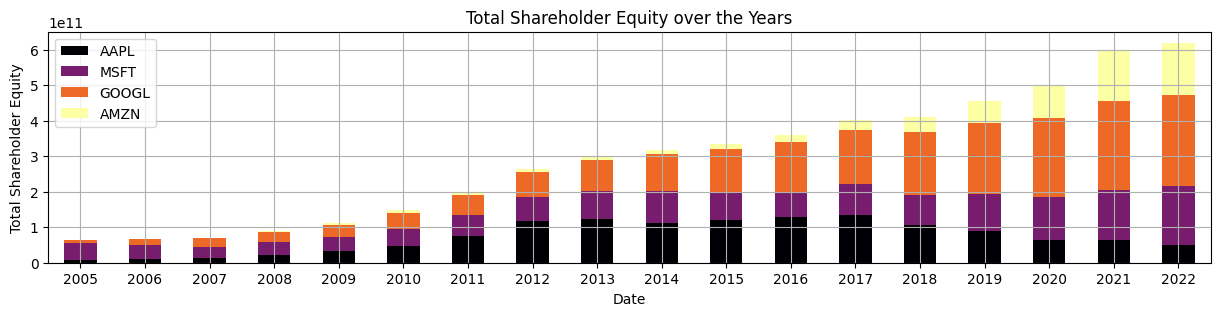

In [8]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()
income_statement_growth = companies.get_income_statement(growth=True)

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Revenues for each company
display(income_statement_growth.loc[:, "Revenue", :])

# Plot the value of Total Shareholder Equity for each company in 2022
shareholder_value = balance_sheet.loc[
    (companies._tickers, "Total Shareholder Equity"), :"2022"
].T
shareholder_value.columns = companies._tickers
shareholder_value.plot.bar(
    figsize=(15, 3),
    title="Total Shareholder Equity over the Years",
    grid=True,
    colormap="inferno",
    rot=0,
    xlabel="Date",
    ylabel="Total Shareholder Equity",
    stacked=True,
)

As shown above, it is possible to show the growth rates for all of the financial statements which can be done by setting `growth=True` in the function. This can also be done within many of the other modules.

In [9]:
companies.get_income_statement(growth=True)

date                                      2005    2006    2007    2008  \
AAPL Revenue                               NaN  0.3865  0.2429   0.353   
     Cost of Goods Sold                    NaN  0.3871  0.1556  0.3458   
     Gross Profit                          NaN   0.385  0.4566  0.3668   
     Research and Development Expenses     NaN  0.3308  0.0983  0.4182   
     General and Administrative Expenses   NaN     NaN     NaN     NaN   
...                                        ...     ...     ...     ...   
MSFT Net Income                            NaN  0.0282  0.1164  0.2571   
     EPS                                   NaN  0.0708  0.1901  0.3194   
     EPS Diluted                           NaN     NaN     NaN     NaN   
     Weighted Average Shares               NaN  -0.037 -0.0667 -0.0425   
     Weighted Average Shares Diluted       NaN -0.0344 -0.0612 -0.0421   

date                                        2009    2010    2011    2012  \
AAPL Revenue                               0.321  0.5202  0.6596  0.4458   
     Cost of Goods Sold                   0.2039  0.5396  0.6295  0.3634   
     Gross Profit                         0.5453  0.4913  0.7335  0.5422   
     Research and Development Expenses     0.202  0.3368  0.3631  0.3919   
     General and Administrative Expenses     NaN     NaN     NaN     inf   
...                                          ...     ...     ...     ...   
MSFT Net Income                           -0.176  0.2877   0.234 -0.2666   
     EPS                                 -0.1421  0.3067  0.2817 -0.2601   
     EPS Diluted                             NaN     NaN     NaN     NaN   
     Weighted Average Shares             -0.0411 -0.0148 -0.0367 -0.0111   
     Weighted Average Shares Diluted     -0.0501 -0.0077 -0.0374 -0.0101   

date                                        2013    2014  ...    2016    2017  \
AAPL Revenue                               0.092  0.0695  ... -0.0773   0.063   
     Cost of Goods Sold                   0.2136   0.053  ... -0.0622  0.0736   
     Gross Profit                        -0.0635  0.0969  ...    -0.1  0.0466   
     Research and Development Expenses    0.3236  0.3499  ...  0.2452  0.1529   
     General and Administrative Expenses  0.0763    -1.0  ...     NaN     NaN   
...                                          ...     ...  ...     ...     ...   
MSFT Net Income                           0.2877  0.0097  ...  0.6845   0.241   
     EPS                                  0.2921  0.0192  ...  0.4228  0.5519   
     EPS Diluted                             NaN     NaN  ...     NaN     NaN   
     Weighted Average Shares             -0.0025 -0.0091  ... -0.0308 -0.0226   
     Weighted Average Shares Diluted     -0.0042 -0.0084  ... -0.0292 -0.0226   

date                                        2018    2019    2020    2021  \
AAPL Revenue                              0.1586 -0.0204  0.0551  0.3326   
     Cost of Goods Sold                    0.161 -0.0121  0.0481  0.2561   
     Gross Profit                         0.1548 -0.0338  0.0667  0.4562   
     Research and Development Expenses    0.2293  0.1392  0.1563  0.1686   
     General and Administrative Expenses     NaN     NaN     NaN     NaN   
...                                          ...     ...     ...     ...   
MSFT Net Income                          -0.3499   1.368  0.1285  0.3837   
     EPS                                 -0.3465  1.3767  0.1389  0.3952   
     EPS Diluted                             NaN     NaN     NaN     NaN   
     Weighted Average Shares             -0.0059 -0.0035 -0.0082 -0.0083   
     Weighted Average Shares Diluted     -0.0049 -0.0053  -0.009 -0.0098   

date                                        2022    2023    2024    2025  
AAPL Revenue                              0.0779  -0.028  0.0202     0.0  
     Cost of Goods Sold                   0.0496 -0.0421 -0.0177     0.0  
     Gross Profit                         0.1174 -0.0096  0.0682     0.0  
     Researc

By default, the lag is set to 1 (one period) but it is possible to change this and add multiple lags as well. This allows you to obtain lagged growth.

In [10]:
companies.get_income_statement(growth=True, lag=[1, 2, 3])

date                                        2005    2006    2007    2008  \
AAPL Revenue                         Lag 1   NaN  0.3865  0.2429   0.353   
                                     Lag 2   NaN     NaN  0.7232  0.6815   
                                     Lag 3   NaN     NaN     NaN  1.3314   
     Cost of Goods Sold              Lag 1   NaN  0.3871  0.1556  0.3458   
                                     Lag 2   NaN     NaN   0.603  0.5553   
...                                          ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2   NaN     NaN -0.1012 -0.1063   
                                     Lag 3   NaN     NaN     NaN -0.1394   
     Weighted Average Shares Diluted Lag 1   NaN -0.0344 -0.0612 -0.0421   
                                     Lag 2   NaN     NaN -0.0935 -0.1008   
                                     Lag 3   NaN     NaN     NaN -0.1317   

date                                          2009    2010    2011    2012  \
AAPL Revenue                         Lag 1   0.321  0.5202  0.6596  0.4458   
                                     Lag 2  0.7873  1.0082   1.523  1.3995   
                                     Lag 3  1.2213   1.717  2.3329  2.6478   
     Cost of Goods Sold              Lag 1  0.2039  0.5396  0.6295  0.3634   
                                     Lag 2  0.6202  0.8534  1.5087  1.2216   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0818 -0.0552 -0.0509 -0.0473   
                                     Lag 3  -0.143 -0.0954 -0.0898 -0.0614   
     Weighted Average Shares Diluted Lag 1 -0.0501 -0.0077 -0.0374 -0.0101   
                                     Lag 2   -0.09 -0.0573 -0.0448 -0.0472   
                                     Lag 3 -0.1458  -0.097 -0.0926 -0.0545   

date                                          2013    2014  ...    2016  \
AAPL Revenue                         Lag 1   0.092  0.0695  ... -0.0773   
                                     Lag 2  0.5789   0.168  ...  0.1797   
                                     Lag 3  1.6203  0.6887  ...  0.2617   
     Cost of Goods Sold              Lag 1  0.2136   0.053  ... -0.0622   
                                     Lag 2  0.6546  0.2779  ...  0.1703   
...                                            ...     ...  ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0135 -0.0116  ... -0.0451   
                                     Lag 3 -0.0497 -0.0225  ... -0.0537   
     Weighted Average Shares Diluted Lag 1 -0.0042 -0.0084  ... -0.0292   
                                     Lag 2 -0.0143 -0.0126  ...  -0.046   
                                     Lag 3 -0.0512 -0.0226  ...  -0.054   

date                                          2017    2018    2019    2020  \
AAPL Revenue                         Lag 1   0.063  0.1586 -0.0204  0.0551   
                                     Lag 2 -0.0192  0.2317   0.135  0.0336   
                                     Lag 3   0.254  0.1364  0.2065  0.1975   
     Cost of Goods Sold              Lag 1  0.0736   0.161 -0.0121  0.0481   
                                     Lag 2  0.0068  0.2465   0.147  0.0354   
...                                            ...     ...     ...     ...   
MSFT Weighted Average Shares         Lag 2 -0.0527 -0.0284 -0.0094 -0.0117   
                                     Lag 3 -0.0666 -0.0583 -0.0318 -0.0176   
     Weighted Average Shares Diluted Lag 1 -0.0226 -0.0049 -0.0053  -0.009   
                                     Lag 2 -0.0511 -0.0273 -0.0101 -0.0142   
                                     Lag 3 -0.0675 -0.0557 -0.0324  -0.019   

date                                          2021    2022    2023    2024  \
AAPL Revenue                         Lag 1  0.3326  0.0779  -0.028  0.0202   
                                     Lag 2   0.406  0.4365  0.0478 -0.0084   
                                     Lag 3  0.3773  0.5156  0.3962  0.0689   


It is also possible to get trailing results. E.g. the TTM Revenues can be acquired by setting trailing to 4 (quarters). Note that this specific metric requires th `quarterly=True` in the Toolkit initalization. Here, you can also combine this with the `growth=True` parameter to get trailing revenue growth.

<Axes: title={'center': '4 Year Trailing Revenue Growth for Apple, Microsoft, Google and Amazon'}, xlabel='Date', ylabel='Revenue'>

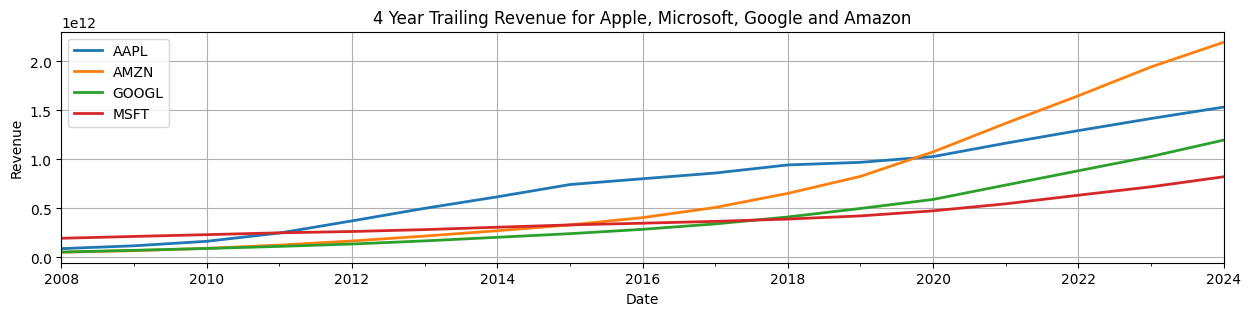

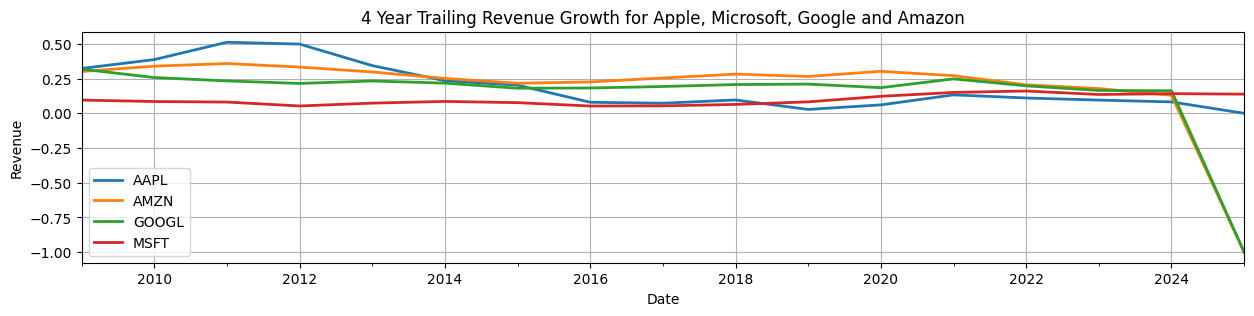

In [11]:
companies.get_income_statement(trailing=4).loc[:, "Revenue", :].T.dropna().plot(
    figsize=(15, 3),
    title="4 Year Trailing Revenue for Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    xlabel="Date",
    ylabel="Revenue",
)

companies.get_income_statement(trailing=4, growth=True).loc[
    :, "Revenue", :
].T.dropna().plot(
    figsize=(15, 3),
    title="4 Year Trailing Revenue Growth for Apple, Microsoft, Google and Amazon",
    grid=True,
    linestyle="-",
    linewidth=2,
    xlabel="Date",
    ylabel="Revenue",
)

It is possible to delve deeper with `get_revenue_product_segmentation` and `get_revenue_geographic_segmentation`. Do note that this is a Professional/Enterprise feature. As an example, this is how this would look for Apple. Note that the Product and Geographic Names can change over time.

In [12]:
display(
    companies.get_revenue_product_segmentation().loc[
        "AAPL", ["Ipad", "Iphone", "Mac"], :
    ]
)

display(companies.get_revenue_geographic_segmentation().loc["AAPL"])

Obtaining product segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.56it/s]


2010  2011          2012          2013           2014  \
AAPL Ipad     0.0   0.0 32424000000.0 31980000000.0  30283000000.0   
     Iphone   0.0   0.0 80477000000.0 91279000000.0 101991000000.0   
     Mac      0.0   0.0 23221000000.0 21483000000.0  24079000000.0   

                      2015           2016           2017           2018  \
AAPL Ipad    23227000000.0  20628000000.0  19222000000.0  18805000000.0   
     Iphone 155041000000.0 136700000000.0 141319000000.0 166699000000.0   
     Mac     25471000000.0  22831000000.0  25850000000.0  25484000000.0   

                      2019           2020           2021           2022  \
AAPL Ipad    21280000000.0  23724000000.0  31862000000.0  29292000000.0   
     Iphone 142381000000.0 137781000000.0 191973000000.0 205489000000.0   
     Mac     25740000000.0  28622000000.0  35190000000.0  40177000000.0   

                      2023           2024  2025  
AAPL Ipad    28300000000.0  26694000000.0   NaN  
     Iphone 200583000000.0 201183000000.0   NaN  
     Mac     29357000000.0  29984000000.0   NaN

Obtaining geographic segmentation data: 100%|██████████| 4/4 [00:00<00:00,  9.16it/s]


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Americas,24498000000.0,38315000000.0,60949000000.0,66197000000.0,68909000000.0,93864000000.0,86613000000.0,96600000000.0,112093000000.0,116914000000.0,124556000000.0,153306000000.0,169658000000.0,162560000000.0,167045000000.0,NaN
Asia Pacific,8256000000.0,22592000000.0,0.0,0.0,0.0,15093000000.0,13654000000.0,15199000000.0,17407000000.0,17788000000.0,19593000000.0,26356000000.0,29375000000.0,29615000000.0,30658000000.0,NaN
China,0.0,0.0,22797000000.0,25946000000.0,30638000000.0,58715000000.0,48492000000.0,44764000000.0,51942000000.0,43678000000.0,40308000000.0,68366000000.0,74200000000.0,72559000000.0,66952000000.0,NaN
Europe,18692000000.0,27778000000.0,0.0,0.0,0.0,50337000000.0,49952000000.0,54938000000.0,62420000000.0,60288000000.0,68640000000.0,89307000000.0,95118000000.0,94294000000.0,101328000000.0,NaN
Japan,3981000000.0,5437000000.0,0.0,0.0,0.0,15706000000.0,16928000000.0,17733000000.0,21733000000.0,21506000000.0,21418000000.0,28482000000.0,25977000000.0,24257000000.0,25052000000.0,NaN


Not only past observations are observable, with `get_analyst_estimates` you can also get the analyst estimates for the future and see the earnings calendar with `get_earnings_calendar`

In [13]:
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 4/4 [00:00<00:00,  9.57it/s]


date                                         2020           2021  \
AAPL Estimated Revenue Low         266870190478.0 357792137980.0   
     Estimated Revenue High        283817373798.0 380513180529.0   
     Estimated Revenue Average     273305434710.0 366419852406.0   
     Estimated EBITDA Low           58883296895.0  85099128888.0   
     Estimated EBITDA High          88324945342.0 127648693332.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average  49539814556.0  96811413439.0   
     Estimated EPS Average                 1.7517           2.05   
     Estimated EPS High                    1.7878         2.0922   
     Estimated EPS Low                     1.7055         1.9959   
     Number of Analysts                      18.0           18.0   

date                                         2022           2023  \
AAPL Estimated Revenue Low         383528516259.0 365223745074.0   
     Estimated Revenue High        407883908152.0 386415277467.0   
     Estimated Revenue Average     392776831583.0 383094279806.0   
     Estimated EBITDA Low          100742070266.0 110816277291.0   
     Estimated EBITDA High         151113105399.0 166224415938.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average 170943431235.0 183330681041.0   
     Estimated EPS Average                -0.1066         2.6955   
     Estimated EPS High                   -0.1036         2.9044   
     Estimated EPS Low                    -0.1089         2.5463   
     Number of Analysts                      26.0           30.0   

date                                         2024           2025  \
AAPL Estimated Revenue Low         389950945023.0 406265549105.0   
     Estimated Revenue High        392209907768.0 418918532880.0   
     Estimated Revenue Average     390480701773.0 414919142308.0   
     Estimated EBITDA Low          128061058386.0 133418823235.0   
     Estimated EBITDA High         128802908518.0 137574101007.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average  57668880571.0  64045135999.0   
     Estimated EPS Average                 5.1539         6.6532   
     Estimated EPS High                    5.4413         7.3156   
     Estimated EPS Low                     4.9656         5.6251   
     Number of Analysts                      37.0           45.0   

date                                         2026           2027  \
AAPL Estimated Revenue Low         430177298678.0 459271858384.0   
     Estimated Revenue High        450678931644.0 460526396587.0   
     Estimated Revenue Average     437102974690.0 459899127486.0   
     Estimated EBITDA Low          141271513419.0 150826253975.0   
     Estimated EBITDA High         148004311095.0 151238248078.0   
...                                           ...            ...   
AMZN Estimated SGA Expense Average  70643580323.0  78029971550.0   
     Estimated EPS Average                 7.5694         9.2283   
     Estimated EPS High                    8.5719        11.0501   
     Estimated EPS Low                     6.5167         6.6075   
     Number of Analysts                      45.0           30.0   

date                                         2028           2029  2030  
AAPL Estimated Revenue Low         457284431831.0 469682250000.0   NaN  
     Estimated Revenue High        493808370394.0 496501750000.0   NaN  
     Estimated Revenue Average     471416254630.0 483092000000.0   NaN  
     Estimated EBITDA Low          150173577142.0 154245057764.0   NaN  
     Estimated EBITDA High         162168147968.0 163052661898.0   NaN  
...                                           ...            ...   ...  
AMZN Estimated SGA Expense Average  86122474573.0  94406272717.0   NaN  
     Estimated EPS Average                11.4458          13.86   NaN  
     Estimated EPS High                   11.7307        14.2049   NaN  
  

Both the Earnings and Dividend Calendars are available.

In [14]:
display(companies.get_earnings_calendar())

display(companies.get_dividend_calendar())

Obtaining earnings calendars: 100%|██████████| 4/4 [00:00<00:00,  9.32it/s]


EPS  Estimated EPS        Revenue  Estimated Revenue  \
     date                                                                 
AAPL 2005-01-12 0.0126         0.0087   3490000000.0       2879249998.0   
     2005-04-13 0.0121         0.0087   3243000000.0       2675474997.0   
     2005-07-13 0.0132         0.0112   3520000000.0       2816000000.0   
     2005-10-11 0.0177         0.0173   3678000000.0       5792850000.0   
     2006-01-18   0.02         0.0187   5749000000.0       5749000000.0   
...                ...            ...            ...                ...   
AMZN 2024-08-01   1.26           1.03 147977000000.0     148665347243.0   
     2024-10-31   1.43           1.14 158877000000.0     157275157418.0   
     2025-02-06   1.86           1.49 187792000000.0     187337375136.0   
     2025-05-01   1.59           1.37 155667000000.0     155148014892.0   
     2025-07-31   1.68           1.31 167702000000.0     161776404970.0   

                Last Updated  
     date                     
AAPL 2005-01-12   2025-07-09  
     2005-04-13   2025-07-09  
     2005-07-13   2025-07-09  
     2005-10-11   2025-07-09  
     2006-01-18   2025-07-09  
...                      ...  
AMZN 2024-08-01   2025-04-25  
     2024-10-31   2025-04-25  
     2025-02-06   2025-05-06  
     2025-05-01   2025-08-01  
     2025-07-31   2025-09-09  

[332 rows x 5 columns]

Obtaining dividend calendars: 100%|██████████| 4/4 [00:00<00:00,  9.21it/s]


Adj Dividend  Dividend  Yield Record Date Payment Date  \
      date                                                                 
AAPL  2012-08-09        0.0946      2.65 0.4269  2012-08-13   2012-08-16   
      2012-11-07        0.0946      2.65 0.9498  2012-11-12   2012-11-15   
      2013-02-07        0.0946      2.65 1.6981  2013-02-11   2013-02-14   
      2013-05-09        0.1089      3.05 1.8284  2013-05-13   2013-05-16   
      2013-08-08        0.1089      3.05 2.4735  2013-08-12   2013-08-15   
...                        ...       ...    ...         ...          ...   
GOOGL 2024-09-09           0.2       0.2  0.269  2024-09-09   2024-09-16   
      2024-12-09           0.2       0.2 0.3421  2024-12-09   2024-12-16   
      2025-03-10           0.2       0.2 0.4823  2025-03-10   2025-03-17   
      2025-06-09          0.21      0.21   0.46  2025-06-09   2025-06-16   
      2025-09-08          0.21      0.21 0.3504  2025-09-08   2025-09-15   

                 Declaration Date  
      date                         
AAPL  2012-08-09       2012-07-24  
      2012-11-07       2012-10-25  
      2013-02-07       2013-01-23  
      2013-05-09       2013-04-23  
      2013-08-08       2013-07-23  
...                           ...  
GOOGL 2024-09-09       2024-07-17  
      2024-12-09       2024-10-28  
      2025-03-10       2025-02-04  
      2025-06-09       2025-04-23  
      2025-09-08       2025-07-21  

[142 rows x 6 columns]

It is also possible to look into Environmental, Social and Governance (ESG) data through `get_esg_scores`

In [15]:
companies.get_esg_scores()

Obtaining ESG scores: 100%|██████████| 4/4 [00:00<00:00,  9.33it/s]


Environmental Score                   Social Score                    \
                    AAPL  MSFT GOOGL  AMZN         AAPL  MSFT GOOGL  AMZN   
date                                                                        
2005               66.64 74.03   NaN 52.95         46.9 61.05   NaN 57.24   
2006               65.74   NaN   NaN 52.78        46.43   NaN   NaN 57.86   
2007               65.66   NaN   NaN 52.12        46.24   NaN   NaN 56.52   
2008               65.36   NaN   NaN 50.37        47.53   NaN   NaN 56.32   
2009               67.93   NaN   NaN 48.72        47.69   NaN   NaN 55.36   
2010               67.57   NaN   NaN  48.1        48.08   NaN   NaN 55.09   
2011               65.49 75.44   NaN 47.77        48.06 60.32   NaN 54.68   
2012               65.09 74.91   NaN 48.11        48.08 59.68   NaN 55.41   
2013               68.07 73.77   NaN 48.16        48.56 59.86   NaN 55.71   
2014               66.19 73.16   NaN 48.23        47.61 59.86   NaN 56.33   
2015               66.37  74.3 76.87 48.69        48.21 60.02 58.25 57.59   
2016               66.03 73.67 76.09 47.76        47.24 57.36 58.89 57.61   
2017                67.8 73.79 75.36 47.76        49.72  58.6 57.85 57.98   
2018               66.63 73.52 72.97 48.58        47.42 58.17 57.17 58.06   
2019               67.43 74.77 73.85 49.12        46.73 59.84 57.56 58.08   
2020               71.99  73.4 71.07 49.36        50.18 58.18 54.66 58.92   
2021               72.39 73.59 76.24 50.14        54.32 58.67 55.91  58.9   
2022               72.39 73.03 75.83 50.15        54.17 58.66 54.53 58.63   
2023               72.79 72.89 71.14 49.57        55.23 58.16 54.05 59.05   
2024               72.07 72.53 77.57 54.78        49.55 58.08 55.58 65.33   
2025               71.62 71.85 73.44 60.09        45.16 57.64 56.23 64.69   

     Governance Score                   ESG Score                    
                 AAPL  MSFT GOOGL  AMZN      AAPL  MSFT GOOGL  AMZN  
date                                                                 
2005             60.6 61.92   NaN 53.62     58.05 65.67   NaN  54.6  
2006            59.55   NaN   NaN 53.49     57.24   NaN   NaN 54.71  
2007            59.32   NaN   NaN 53.95     57.07   NaN   NaN 54.19  
2008            60.23   NaN   NaN 53.71     57.71   NaN   NaN 53.47  
2009            60.75   NaN   NaN 53.35     58.79   NaN   NaN 52.47  
2010            61.81   NaN   NaN 53.15     59.15   NaN   NaN 52.12  
2011             61.3 62.99   NaN  53.3     58.29 66.25   NaN 51.91  
2012            61.31 62.87   NaN 53.88     58.16 65.82   NaN 52.46  
2013            62.08 64.08   NaN 53.95     59.57  65.9   NaN  52.6  
2014            61.83 64.14   NaN  54.6     58.54 65.72   NaN 53.05  
2015            61.35 63.99 60.99 55.21     58.64  66.1 65.37 53.83  
2016            61.66 61.83 60.63 54.13     58.31 64.29  65.2 53.17  
2017            62.14 62.07  59.5 54.76     59.89 64.82 64.24  53.5  
2018            61.35 61.96 59.05 54.53     58.47 64.55 63.06 53.72  
2019            61.02 63.07 59.15  54.3      58.4 65.89 63.52 53.83  
2020            61.63 61.05 56.52 53.43     61.27 64.21 60.75  53.9  
2021            65.28 61.14 60.69 53.16     63.99 64.47 64.28 54.07  
2022            65.05  61.4 60.76 54.32     63.87 64.37 63.71 54.37  
2023            65.73 60.65 55.71 52.78     64.59  63.9  60.3  53.8  
2024            61.63  60.7 57.93 58.96     61.08 63.77 63.69 59.69  
2025            60.49 59.62 59.22 54.75     59.09 63.04 62.96 59.84

When needing to work with treasury rates, `get_treasury_data` is excellent to obtain any range of treasury rates. These can be used to calculate excess returns and excess volatility as needed for performance metrics. The Toolkit parameter `risk_free_rate` also picks one of these rates as the risk free rate to use e.g. in Sharpe Ratio calculations.

In [16]:
companies.get_treasury_data()

Open                           High                         \
           13 Week 5 Year 10 Year 30 Year 13 Week 5 Year 10 Year 30 Year   
date                                                                       
2005-01-03   0.022 0.0365  0.0426  0.0486  0.0222 0.0366  0.0427  0.0487   
2005-01-04  0.0228 0.0362  0.0421  0.0481  0.0229 0.0373  0.0431   0.049   
2005-01-05   0.023 0.0373   0.043  0.0489   0.023 0.0374   0.043  0.0489   
2005-01-06  0.0227 0.0371  0.0429  0.0486  0.0227 0.0372   0.043  0.0487   
2005-01-07  0.0227 0.0368  0.0426  0.0484  0.0228 0.0375  0.0431  0.0486   
...            ...    ...     ...     ...     ...    ...     ...     ...   
2025-09-03  0.0403 0.0374  0.0427  0.0496  0.0403 0.0375  0.0428  0.0497   
2025-09-04    0.04 0.0367  0.0419  0.0487  0.0401 0.0368  0.0421   0.049   
2025-09-05  0.0396 0.0362  0.0414  0.0484  0.0396 0.0362  0.0414  0.0489   
2025-09-08  0.0391 0.0357  0.0407  0.0475  0.0393 0.0359  0.0409  0.0477   
2025-09-09  0.0394 0.0358  0.0407  0.0471  0.0394 0.0359  0.0407  0.0472   

               Low         ...  Return         Volatility                 \
           13 Week 5 Year  ... 10 Year 30 Year    13 Week 5 Year 10 Year   
date                       ...                                             
2005-01-03   0.022 0.0361  ...     0.0  -0.001     2.8125 0.0353  0.0262   
2005-01-04  0.0228 0.0361  ...  0.0142  0.0129     2.8125 0.0353  0.0262   
2005-01-05  0.0228 0.0369  ...     0.0 -0.0066     2.8125 0.0353  0.0262   
2005-01-06  0.0227 0.0368  ... -0.0023  0.0014     2.8125 0.0353  0.0262   
2005-01-07  0.0227 0.0356  ...  0.0047 -0.0002     2.8125 0.0353  0.0262   
...            ...    ...  ...     ...     ...        ...    ...     ...   
2025-09-03  0.0401 0.0367  ... -0.0164 -0.0161     2.8125 0.0353  0.0262   
2025-09-04  0.0399 0.0365  ... -0.0071 -0.0041     2.8125 0.0353  0.0262   
2025-09-05   0.039 0.0354  ... -0.0215 -0.0185     2.8125 0.0353  0.0262   
2025-09-08   0.039 0.0356  ... -0.0098 -0.0188     2.8125 0.0353  0.0262   
2025-09-09  0.0394 0.0358  ...  0.0042  0.0055     2.8125 0.0353  0.0262   

                   Cumulative Return                         
           30 Year           13 Week 5 Year 10 Year 30 Year  
date                                                         
2005-01-03  0.0186               1.0    1.0     1.0     1.0  
2005-01-04  0.0186            1.0399 1.0212  1.0142  1.0129  
2005-01-05  0.0186            1.0354 1.0229  1.0142  1.0062  
2005-01-06  0.0186            1.0286 1.0185  1.0118  1.0077  
2005-01-07  0.0186            1.0331 1.0267  1.0166  1.0075  
...            ...               ...    ...     ...     ...  
2025-09-03  0.0186             1.824 1.0143  0.9976  1.0152  
2025-09-04  0.0186            1.8149 1.0061  0.9905   1.011  
2025-09-05  0.0186             1.774 0.9868  0.9692  0.9923  
2025-09-08  0.0186            1.7831  0.984  0.9597  0.9736  
2025-09-09  0.0186            1.7868 0.9893  0.9637   0.979  

[5198 rows x 40 columns]

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [17]:
companies.get_profile()

Obtaining company profiles: 100%|██████████| 4/4 [00:00<00:00,  9.34it/s]


,AAPL,GOOGL,MSFT,AMZN
Symbol,AAPL,GOOGL,MSFT,AMZN
Price,237.88,234.04,498.2,235.84
Market Capitalization,3530234321551.0005,2830613669731,3703205294000,2515210016000
Beta,1.109,1.011,1.04,1.309
Last Dividend,1.02,1.02,3.32,0
Range,169.21-260.1,140.53-238.13,344.79-555.45,161.38-242.52
Change,-1.81,-0.96,3.2,3.5100000000000002
Change %,-0.75514,-0.40851000000000004,0.64646,1.51078
Volume,48650045,32388188,16648027,33152785
Average Volume,54198408,38628975,21502998,41687927


This is just a glimpse of what is available as there are nearly 200 different other metrics you can access directly in the Toolkit, visit the related Notebook by clicking on one of the buttons below.

<style>
.button {
  color: #fff !important;
  background-color: #58abc4;
  display: inline-block;
  margin-bottom: 0.25em;
  padding: 0.5em 1em;
  font-family: -apple-system,BlinkMacSystemFont,"Roboto","Segoe UI","Helvetica Neue","Lucida Grande",Arial,sans-serif;
  font-size: .75em;
  font-weight: bold;
  text-align: center;
  text-decoration: none;
  border-width: 0;
  border-radius: 4px;
  cursor: pointer;
}

.button-current {
  background-color: #d67f05;
}

a:hover {
  color: #fff !important;
  font-weight: normal !important;
}
</style>

<div style="display: flex; justify-content: space-between;" class="show-on-desktop">
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//getting-started" target="_blank" class="button button-current" style="flex: 1;margin-right:5px"">Toolkit</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//discovery-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Discovery</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//ratios-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Ratios</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//models-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Models</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//options-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Options</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//technicals-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Technicals</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//fixedincome-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Fixed income</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//risk-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Risk</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//performance-module" target="_blank" class="button" style="flex: 1;margin-right:5px">Performance</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//economics-module"  target="_blank" class="button" style="flex: 1;margin-right:5px">Economics</a>
    <a href="https://www.jeroenbouma.com/projects/financetoolkit//portfolio-module" target="_blank" class="button" style="flex: 1; ">Portfolio</a>
</div>